# Individual Project
> Done by: Ramya Rengarajan

## Covid-19 Data Analysis and Visualization. 


Data Source:https://github.com/CSSEGISandData/COVID-19

## Description

It is your task to explore and analyze a dataset. Using Pandas and visualization tools of your choice, you will extract insights by inspecting and comparing variables. You will summarize your conclusions and present your findings with plots. 

## Analysis strategy (10 pts)
Describe your plan for analyzing the data, showing you understand the basic elements of exploratory data analysis.
You may want to include a description of the dataset, an analysis strategy for reading in, manipulating, and analyzing data (e.g. pseudo code), including a description of steps and packages used. Describe the reason behind your methods. Hint: you may also fill this section out after your analysis after your analysis to clarify your methods. 

#### Steps for analyzing the data.

1. Find a relevant [data source](https://github.com/CSSEGISandData/COVID-19)
2. Import libraries like pandas, seaborn, numpy
3. Import the data as csv file from local directory
4. Poke around the data and get more familiar with it, using such methods as head(), tail(), info(), describe(), shape(), etc.
5. Clean up the N/A or empty values present in the data set. 
6. As the data choosen is a time series, sorting by observation date is crucial to get the correct timeline. 
7. Provide meaningful insights using built-in pandas functions like sort_values(), groupby(), diff(), idmax(), sum() additionaly by writing custom agg functions. 
8. Provide stylized tables for better visualization. 
9. Convert the tabular information into seaborn grpahs. 
10. Provide usefull summary based on the analysis done using the given steps. 

#### Description of the Dataset

As we are all living through the current global pandemic COVID-19, I decided to use COVID-19 daily dashboard dataset prepared by John Hopkins University. The information and insights that we can get from this dataset can be used to educate wider population, predict trends and also help governing bodies in talking decisions.  

This dataset is a live dataset as the COVID-19 situation changes rapidly everyday. 

In [373]:
import pandas as pd
import numpy as numpy
import seaborn as sns

## Read in the file (5 pts)

### The dataset contains the affected cases of corona virus- as of March 30th. 

In [436]:
covid_19_df = pd.read_csv("covid_19_data.csv")

##### Examining the dataset to find the no of rows and columns


In [437]:

covid_19_df..shape

(7318, 8)

##### Obtaining the first and last 10 rows


In [442]:
covid_19_df.tail(10)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
7308,7309.0,3/20/2020,,Jersey,2020-03-17T18:33:03,0.0,0.0,0.0
7309,7310.0,3/20/2020,,Puerto Rico,2020-03-17T16:13:14,0.0,0.0,0.0
7310,7311.0,3/20/2020,,Republic of the Congo,2020-03-17T21:33:03,0.0,0.0,0.0
7311,7312.0,3/20/2020,,The Bahamas,2020-03-19T12:13:38,0.0,0.0,0.0
7312,7313.0,3/20/2020,,The Gambia,2020-03-18T14:13:56,0.0,0.0,0.0
7313,NaN,NaN,,NaN,NaN,NaN,NaN,NaN
7314,NaN,NaN,,NaN,NaN,NaN,NaN,NaN
7315,NaN,NaN,,NaN,NaN,NaN,NaN,NaN
7316,NaN,NaN,,NaN,NaN,NaN,NaN,NaN
7317,NaN,NaN,,NaN,NaN,NaN,NaN,NaN


##### Sort the data based on observed date

In [446]:

covid_19_df.sort_values(by='ObservationDate').head(10)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
73,28.0,1/22/2020,Sichuan,Mainland China,1/22/2020 17:00,5.0,0.0,0.0
48,1.0,1/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
49,2.0,1/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
50,3.0,1/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
51,4.0,1/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0


##### Cleaning - Setting Province/State as a non null value for easier computation

In [440]:
covid_19_df[['Province/State']] = covid_19_df[['Province/State']].fillna('')

In [379]:
covid_19_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7313 entries, 0 to 7312
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   SNo              7313 non-null   int64 
 1   ObservationDate  7313 non-null   object
 2   Province/State   7313 non-null   object
 3   Country/Region   7313 non-null   object
 4   Last Update      7313 non-null   object
 5   Confirmed        7313 non-null   int64 
 6   Deaths           7313 non-null   int64 
 7   Recovered        7313 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 457.2+ KB


## Pandas insights (5 pts)
Provide at least 3 insights using Pandas. These may include descriptive statistics such as mean, median, counts, etc. Use built-in Pandas functions.

### Insight 1

In [417]:
#Group by observation date and find the total number of deaths,confirmed,recovered in corona virus using sum function
#Returning the cases for the most recent date in the data set
cases_df = covid_19_df.groupby('ObservationDate')['Deaths','Confirmed','Recovered' ]
total_cases = cases_df.sum()[['Deaths','Confirmed','Recovered']].tail(1)
table_of_cases = total_cases.style.background_gradient(cmap='Reds',axis=(1))
table_of_cases

C:\Users\ramya\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,Deaths,Confirmed,Recovered
ObservationDate,,,
03/20/2020,11299,272167,87403


### Insight 2

Based on the information in HEAD we can see that the virus originated in Mainland china.  
Epicentre of COVID-19 was a wet market in Wuhan which is located in province Hubei.  
Using describe function to find the mean,maximum and minumum for COVID-19 the cases registered,recovered, deaths  per day .

In [451]:
covid_19_df[(covid_19_df['Country/Region']=='Mainland China') & (covid_19_df['Province/State'] == 'Hubei')].describe()

,SNo,Confirmed,Deaths,Recovered
count,59.000000,59.000000,59.000000,59.000000
mean,2368.457627,45618.389831,1787.474576,20358.254237
std,1949.681223,26421.803908,1173.763302,21212.003782
min,14.000000,444.000000,17.000000,28.000000
25%,801.500000,20888.500000,583.500000,725.000000
50%,1867.000000,62442.000000,2144.000000,11788.000000
75%,3482.500000,67529.000000,2916.500000,41312.500000
max,7015.000000,67800.000000,3133.000000,58382.000000


### Insight 3

#### Finding maximum number of deaths in a day using idxmax. 
Sorting the values by Observationdate in descending order.

Subtract one from idxmax to find the second highest value in deaths column for the previous day

Finding the difference to calculate the maximum people died in a day - 627 Deaths in a day.

In [382]:

day_with_max_death = covid_19_df.loc[covid_19_df.sort_values(by='ObservationDate', ascending= False)['Deaths'].idxmax()]
day_with_second_max_death = covid_19_df.loc[covid_19_df.sort_values(by='ObservationDate', ascending=False)['Deaths'].idxmax()-1]
print("Day with highest death value")
print(day_with_max_death)
print("------------------------------------------")
print("Day with second highest death value")
print(day_with_second_max_death)


print("\nMaximum people died in a day:")
print(day_with_max_death['Deaths'] - day_with_second_max_death['Deaths'])

Day with highest death value
SNo                               7016
ObservationDate             03/20/2020
Province/State                        
Country/Region                   Italy
Last Update        2020-03-20T17:43:03
Confirmed                        47021
Deaths                            4032
Recovered                         4440
Name: 2017, dtype: object
------------------------------------------
Day with second highest death value
SNo                               6724
ObservationDate             03/19/2020
Province/State                        
Country/Region                   Italy
Last Update        2020-03-19T17:43:03
Confirmed                        41035
Deaths                            3405
Recovered                         4440
Name: 2016, dtype: object

Maximum people died in a day:
627


## Groupby analysis (10 pts)
Perform at least one analysis using groupby

Group by country and sort to find out which country ranks has the largest number of corona virus cases and sort countries in descending order. 

Stylize the table

In [447]:
countrywise_df = covid_19_df.sort_values(by='Confirmed', ascending=False).groupby('Country/Region').head(1).reset_index(drop=True)
countrywise_df_clean = countrywise_df[['Country/Region', 'Confirmed', 'Deaths', 'Recovered']].head(25).style.background_gradient(cmap='Reds')
countrywise_df_clean

,Country/Region,Confirmed,Deaths,Recovered
0,Mainland China,67800.000000,3133.000000,58382.000000
1,Italy,47021.000000,4032.000000,4440.000000
2,Spain,20410.000000,1043.000000,1588.000000
3,Germany,19848.000000,67.000000,180.000000
4,Iran,19644.000000,1433.000000,6745.000000
5,France,12612.000000,450.000000,12.000000
6,South Korea,8652.000000,94.000000,1540.000000
7,US,8310.000000,42.000000,0.000000
8,Switzerland,5294.000000,54.000000,15.000000
9,UK,3983.000000,177.000000,65.000000


## Analysis with custom functions (15 points) 
Includes at least 2 custom functions. These may perform a custom analysis or data manipulation/cleaning operation. Functions that mimic built-in Numpy or Pandas functions are also acceptable. You may integrate these functions in other steps of the analysis. If this is the case, specify below in which section of the notebook you used a custom function.

#### Find people still hospitalized

##### To find people who are still hospitalized:
1. Find the difference between confirmed,deaths and recovered
2. Appending a new column intreatment to see who are all hospitalized

In [384]:
countrywise_df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,7015,03/20/2020,Hubei,Mainland China,2020-03-20T07:43:02,67800,3133,58382
1,7016,03/20/2020,,Italy,2020-03-20T17:43:03,47021,4032,4440
2,7017,03/20/2020,,Spain,2020-03-20T17:43:03,20410,1043,1588
3,7018,03/20/2020,,Germany,2020-03-20T20:13:15,19848,67,180
4,7019,03/20/2020,,Iran,2020-03-20T15:13:21,19644,1433,6745


In [385]:

def inTreatment(dataf):
    val = dataf['Confirmed'] - dataf['Deaths'] - dataf['Recovered']
    return val

countrywise_df['inTreatment'] = countrywise_df.apply(lambda row:inTreatment(row), axis=1)
countrywise_df.sort_values(by='inTreatment', ascending=False).head(10)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,inTreatment
1,7016,03/20/2020,,Italy,2020-03-20T17:43:03,47021,4032,4440,38549
3,7018,03/20/2020,,Germany,2020-03-20T20:13:15,19848,67,180,19601
2,7017,03/20/2020,,Spain,2020-03-20T17:43:03,20410,1043,1588,17779
5,7020,03/20/2020,France,France,2020-03-20T22:43:03,12612,450,12,12150
4,7019,03/20/2020,,Iran,2020-03-20T15:13:21,19644,1433,6745,11466
7,7022,03/20/2020,New York,US,2020-03-20T22:14:43,8310,42,0,8268
6,7021,03/20/2020,,South Korea,2020-03-20T02:13:46,8652,94,1540,7018
0,7015,03/20/2020,Hubei,Mainland China,2020-03-20T07:43:02,67800,3133,58382,6285
8,7023,03/20/2020,,Switzerland,2020-03-20T18:13:09,5294,54,15,5225
9,7024,03/20/2020,United Kingdom,UK,2020-03-20T20:13:18,3983,177,65,3741


#### Second custom function to fill out empty provinces to its country name when its found empty
For computation purposes

In [386]:

def setprovince(dataf):
    if not dataf['Province/State']:
        return dataf['Country/Region']
    else:
        return dataf['Province/State']
    
countrywise_df['Province/State'] = countrywise_df.apply(lambda row:setprovince(row), axis=1)
countrywise_df.sort_values(by='Province/State', ascending=True).head(20)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,inTreatment
103,7197,03/20/2020,Afghanistan,Afghanistan,2020-03-20T14:43:04,24,0,1,23
79,7158,03/20/2020,Albania,Albania,2020-03-20T15:13:21,70,2,0,68
69,7138,03/20/2020,Algeria,Algeria,2020-03-20T15:43:24,90,11,32,47
76,7152,03/20/2020,Andorra,Andorra,2020-03-20T15:13:21,75,0,1,74
171,7278,03/20/2020,Angola,Angola,2020-03-20T10:13:38,1,0,0,1
172,5275,03/13/2020,Antigua and Barbuda,Antigua and Barbuda,2020-03-11T20:00:00,1,0,0,1
63,7122,03/20/2020,Argentina,Argentina,2020-03-20T02:43:10,128,3,3,122
59,7117,03/20/2020,Armenia,Armenia,2020-03-20T14:43:04,136,0,1,135
138,6660,03/18/2020,Aruba,Aruba,2020-03-18T11:53:04,4,0,0,4
11,7026,03/20/2020,Austria,Austria,2020-03-20T15:43:24,2388,6,9,2373


## Univariate plots (5 points)
Provide at least 3 univariate plots

### Univariate plot 1

#### Plotting the status on March 20th for the cases

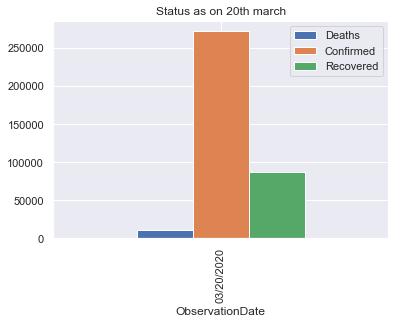

In [388]:
total_cases.plot(kind='bar', title='Status as on 20th march')

### Univariate plot 2

##### Plotting the confirmed cases in sorted countrywise using barplot

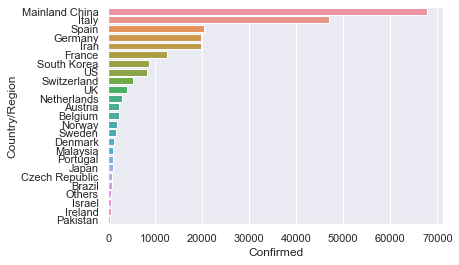

In [389]:

c_temp = countrywise_df.sort_values('Confirmed', ascending=False)[['Country/Region', 'Confirmed']]
d_temp = countrywise_df.sort_values('Deaths', ascending=False)[['Country/Region', 'Deaths']]
r_temp = countrywise_df.sort_values('Recovered', ascending=False)[['Country/Region', 'Recovered']]
sns.barplot(x="Confirmed", y="Country/Region", data=c_temp.head(25))

### Univariate plot 3

##### Using barplot to find the no of Deaths cases for each country

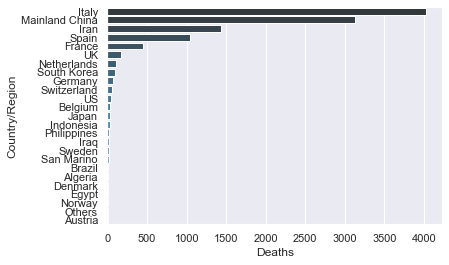

In [390]:
sns.barplot(x="Deaths", y="Country/Region", data=d_temp.head(25), palette="Blues_d")

## Bivariate plots (10 points)
Provide at least 2 bivariate plots

### Bivariate plot 1

We can see from prior analysis that Italy ranks second in the list of countries affected by COVID-19.

Here are few key observations on Italy.

##### Plotting the number of cases in Italy as per observationdate

In [460]:
df = covid_19_df[(covid_19_df['Country/Region']=='Italy')]
df.index = df["ObservationDate"]
#df.columns.name = 'Confirmed'
#df.index = 'Observation Date'


##### Plotting the number of confirmed cases over the period

Text(0, 0.5, 'Confirmed cases')

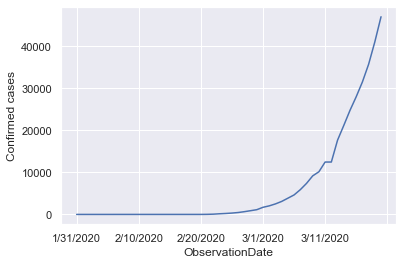

In [462]:
plt = df['Confirmed'].plot(x='Confirmed')
plt.set_ylabel('Confirmed cases')

##### Plotting the number of recovered cases over the observed period

Text(0, 0.5, 'Recovered cases')

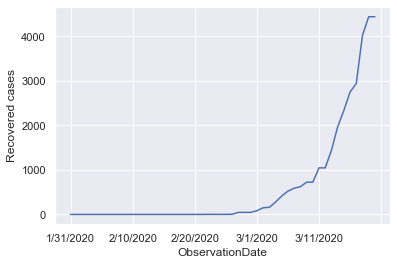

In [463]:
plot1=df['Recovered'].plot(x='Recovered')
plot1.set_ylabel('Recovered cases')

### Bivariate plot 2

##### To plot the difference between deaths happening each day

Text(0, 0.5, 'No of deaths')

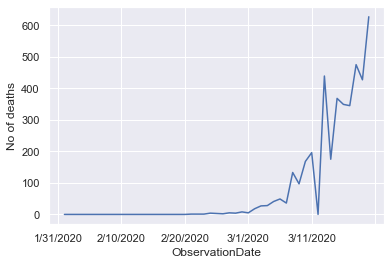

In [464]:
plot2=df['Deaths'].diff().plot(x='Deaths')
plot2.set_ylabel('No of deaths')

## Multivariate plot (10 points)
Provide at least 1 multivariate

### Multivariate plot 1

### To plot the number of deaths,confirmed , recovered cases in Mainland china's province Hubei(Wuhan)

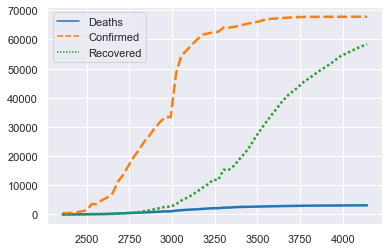

In [407]:
df_mv = covid_19_df[(covid_19_df['Country/Region']=='Mainland China') & (covid_19_df['Province/State'] == 'Hubei')][['Deaths','Confirmed','Recovered']]
sns.set(style="darkgrid")
sns.lineplot(data = df_mv, palette="tab10",linewidth=2.5)

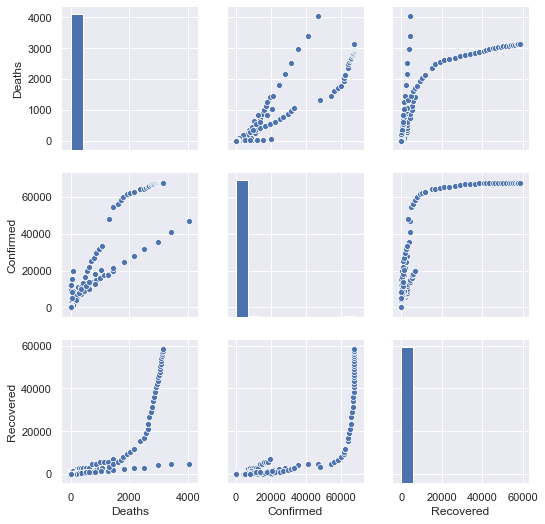

In [396]:
#Correlation between the growth of conf
sns.pairplot(covid_19_df[['Deaths','Confirmed','Recovered']], palette="Set2", height=2.5)


## Conclusions (20 points)
Summarize your conclusions including discovered insights. 

Analysing the corona virus dataset during this crucial time helped me to gain more insight about the severity
1. In general there has been a steady increase in people getting exposed to corona virus in all the countries
2. Mainland china is shown to have the largest number of corona virus cases as on March 20,2020.
3. It was also interesting to see a steady increase in the confirmed and death  cases.
4. It was kind of shocking to note the spread of this disease in every province in every country gradually.
5. After analysing the dataset, Italy becomes the seond highest country for corona virus.
6. The number of deaths increasing day by day is kind of scary and it only decreases after it has spread to an large extent.
7. Overall Analysing the dataset day by day, with observation date the spread is terrifying.

Eventhough we have seen enormous trends in our technology so far, after seeing this situation I can visualise we still have a long way to go in our advancements. This project deepened my understanding towards pandas and python and I would still keep exploring the dataset to gain some more meaningful insights.


## Code is functional and runs without error (10 pts)
Verify this by following these steps.

1) Reset Kernel. Kernel>>Restart Kernel...

2) Rerun all cells. Run>>Run All Cells